# Multiclass text classification with deep learning: keras library

DMML - 2021   
Melinda Femminis, Catherine Pedroni, Estelle Valerie Tsague Mbialeu

# Imports


In [ ]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/cpedroni/DMML2021_Microsoft/main/data/training_data.csv')
to_predict = pd.read_csv('https://raw.githubusercontent.com/cpedroni/DMML2021_Microsoft/main/data/unlabelled_test_data.csv')

In [ ]:
df.head()

# Get data ready for model

In [ ]:
values = df['sentence']
target = df['difficulty']

In [ ]:
MAX_NB_WORDS = 20000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(values.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 15576 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(values.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (4800, 250)


In [ ]:
Y = pd.get_dummies(target).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (4800, 6)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("X and y training data:")
print(X_train.shape, y_train.shape)
print("X and y testing data:")
print(X_test.shape, y_test.shape)

X and y training data:
(3840, 250) (3840, 6)
X and y testing data:
(960, 250) (960, 6)


# Model

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          2000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 2,081,006
Trainable params: 2,081,006
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 128, validation_split=0.1)

Epoch 1/50
27/27 [==============================] - 60s 2s/step - loss: 1.7093 - accuracy: 0.2627 - val_loss: 1.5745 - val_accuracy: 0.3281
Epoch 2/50
27/27 [==============================] - 48s 2s/step - loss: 1.4890 - accuracy: 0.3646 - val_loss: 1.4507 - val_accuracy: 0.3594
Epoch 3/50
27/27 [==============================] - 29s 1s/step - loss: 1.3286 - accuracy: 0.4349 - val_loss: 1.3399 - val_accuracy: 0.3802
Epoch 4/50
27/27 [==============================] - 28s 1s/step - loss: 1.1126 - accuracy: 0.5408 - val_loss: 1.2821 - val_accuracy: 0.4323
Epoch 5/50
27/27 [==============================] - 29s 1s/step - loss: 0.8779 - accuracy: 0.6615 - val_loss: 1.3084 - val_accuracy: 0.4167
Epoch 6/50
27/27 [==============================] - 30s 1s/step - loss: 0.6889 - accuracy: 0.7567 - val_loss: 1.4352 - val_accuracy: 0.4245
Epoch 7/50
27/27 [==============================] - 30s 1s/step - loss: 0.4941 - accuracy: 0.8377 - val_loss: 1.6851 - val_accuracy: 0.3906
Epoch 8/50
27/27 [==

# Accuracy and plots

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9411
Testing Accuracy:  0.4396


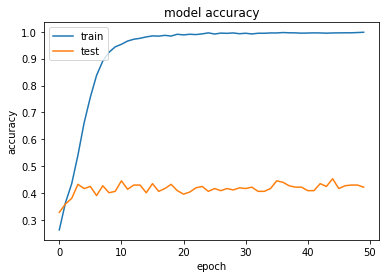

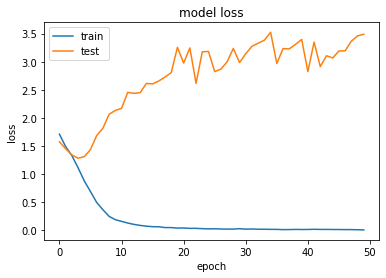

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Metrics on test data

In [ ]:
predicted = model.predict(X_test)
# Convert vectors back to classes
predicted = np.argmax(predicted, axis=1)
test_labels = np.argmax(y_test, axis=1)

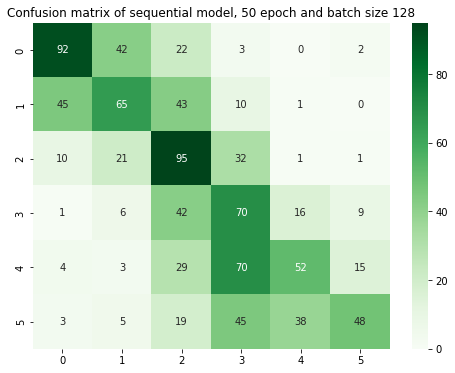

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Confusion matrix of sequential model, 50 epoch and batch size 128")
sns.heatmap(pd.DataFrame(confusion_matrix(test_labels, predicted)), annot=True, cmap='Greens', fmt='.4g')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predicted))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58       161
           1       0.46      0.40      0.42       164
           2       0.38      0.59      0.46       160
           3       0.30      0.49      0.37       144
           4       0.48      0.30      0.37       173
           5       0.64      0.30      0.41       158

    accuracy                           0.44       960
   macro avg       0.48      0.44      0.44       960
weighted avg       0.48      0.44      0.44       960



# Apply model on new data and save as csv for kaggle

In [ ]:
new_data = preprocess(to_predict['sentence'])
seq = tokenizer.texts_to_sequences(new_data)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)

In [ ]:
# Convert vectors back to classes
pred = np.argmax(pred, axis=1)
pred

array([5, 1, 0, ..., 5, 1, 2])

In [ ]:
sample_submission = to_predict.drop(["sentence"], axis=1)
sample_submission["difficulty"] = pd.Series(pred)
sample_submission['difficulty'] = ['A1' if x==0 
                   else 'A2' if x==1
                   else 'B1' if x==2
                   else 'B2' if x==3
                   else 'C1' if x==4
                   else 'C2' for x in sample_submission.difficulty]
sample_submission['difficulty'] = sample_submission['difficulty'].astype(str)

In [ ]:
sample_submission.head()
sample_submission.to_csv('sample_submission.csv', index=False)
!cp sample_submission.csv "drive/My Drive/"